In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

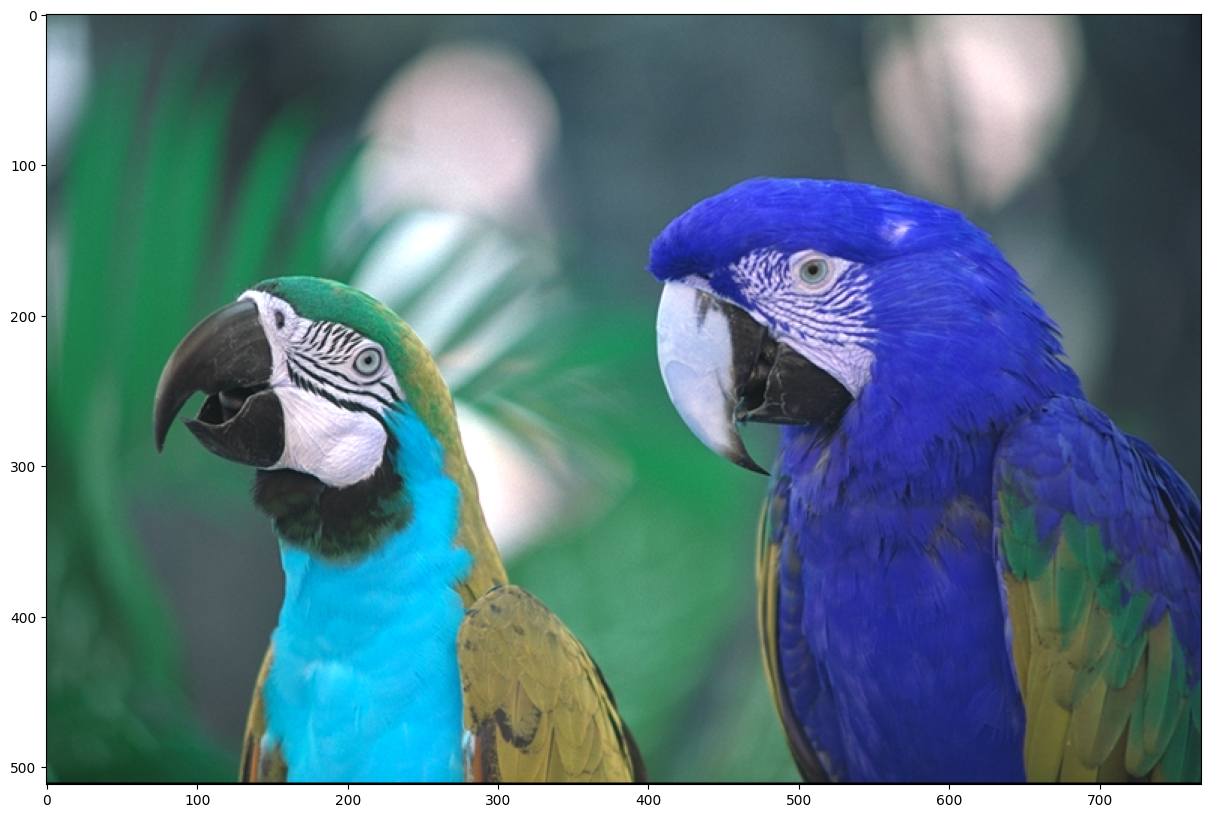

In [2]:
# Load image
img = cv2.imread('kodim23.png')
# Convert it to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

In [16]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]]) / 255

In [17]:
# Cast the image to float
img = plt.imread('kodim23.png').astype(float)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c]

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.linalg.norm(colors - pixel, axis=1)
        # print(distances)
        closest_color_idx = np.argmin(distances)
        # print(closest_color_idx)
        new_pixel = colors[closest_color_idx]

        # Apply quantization
        quantized[r, c, :] = new_pixel

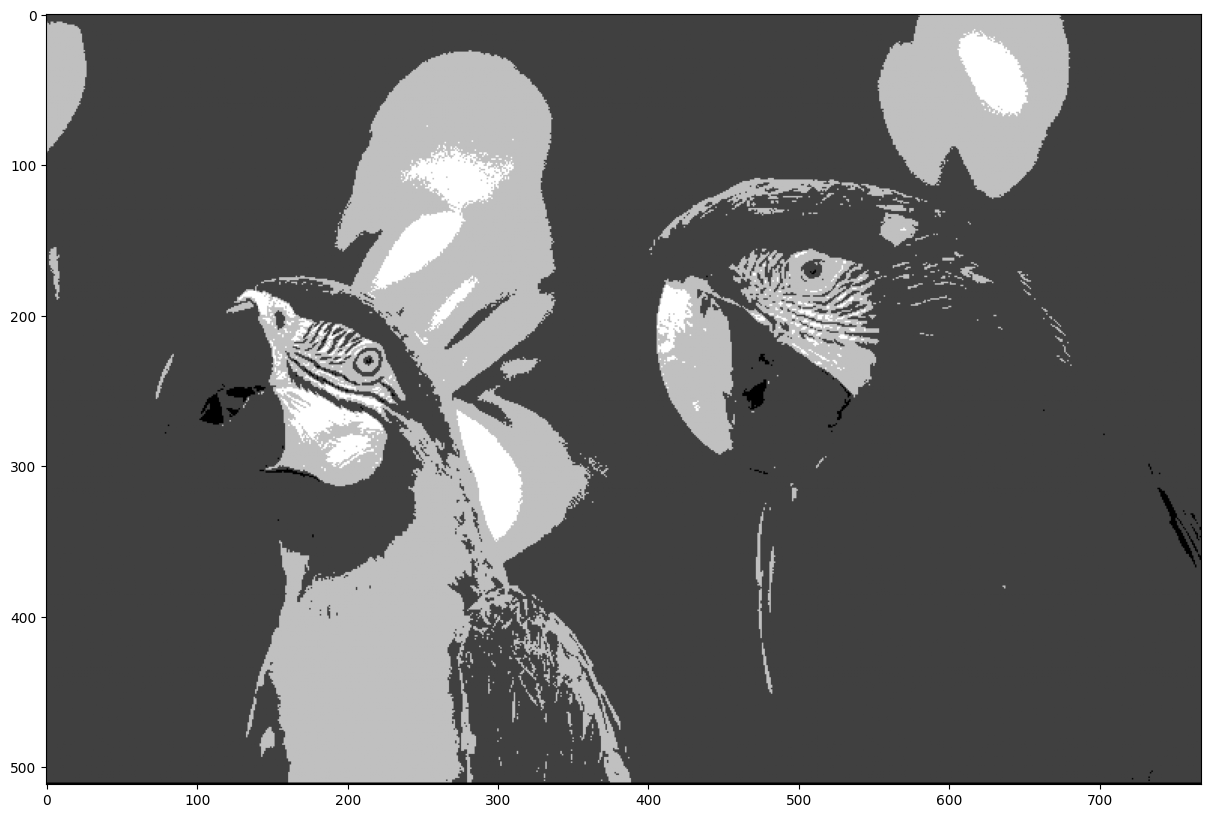

In [18]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized)

In [19]:
# Compute average quantization error
avg_quant_error = np.mean(np.linalg.norm(img - quantized, axis=2))
avg_quant_error

0.265617104386533

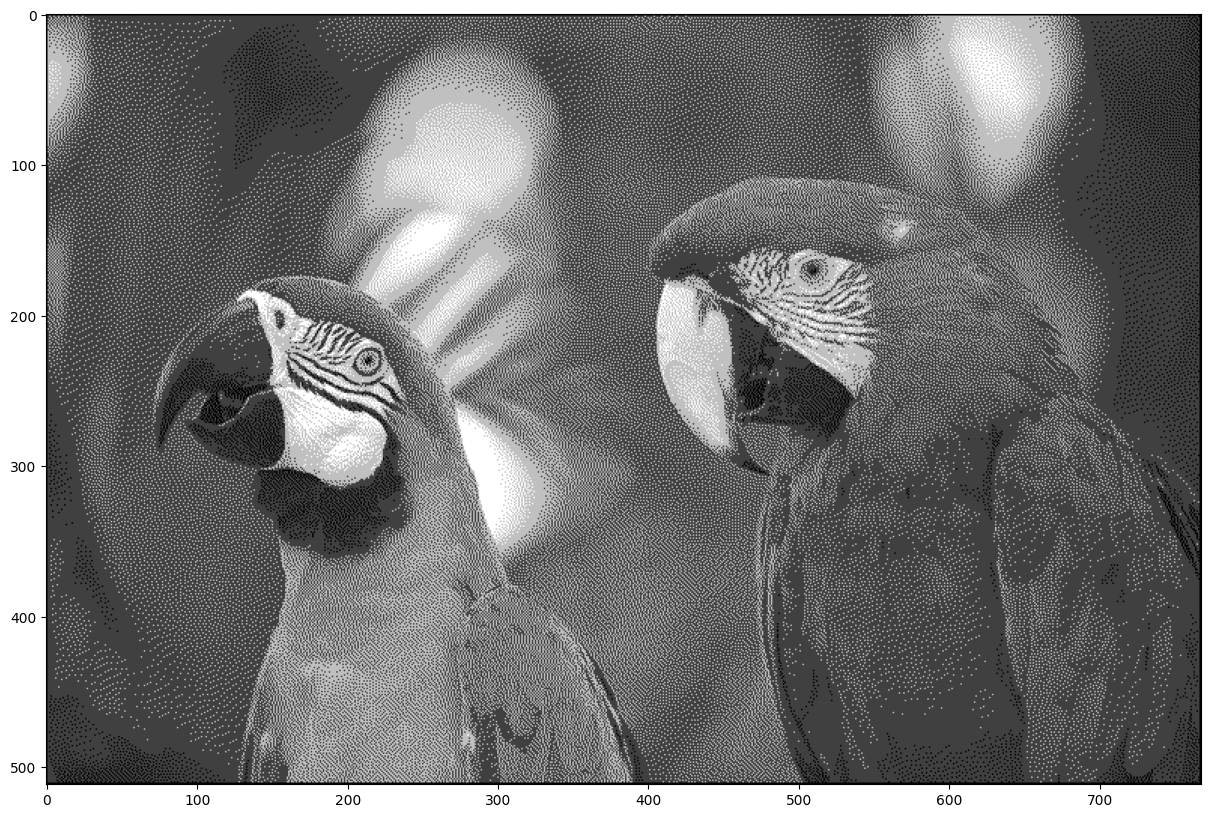

In [22]:
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

# Floyd-Steinberg diffusion coefficients
fs_diffusion_matrix = np.array([[0, 0, 7/16],
                                [3/16, 5/16, 1/16]])

for r in range(1, rows-1):
    for c in range(1, cols-1):
        pixel = img_tmp[r, c]

        distances = np.linalg.norm(colors - pixel, axis=1)
        closest_color_idx = np.argmin(distances)
        new_pixel = colors[closest_color_idx]

        # Compute quantization error
        quant_error = pixel - new_pixel

        img_tmp[r, c+1] += quant_error * 7/16
        img_tmp[r+1, c-1] += quant_error * 3/16
        img_tmp[r+1, c] += quant_error * 5/16
        img_tmp[r+1, c+1] += quant_error * 1/16

        # Apply dithering
        dithering[r, c, :] = new_pixel

plt.imshow(dithering)
plt.show()


In [26]:
avg_d_error = np.mean(np.linalg.norm(img - dithering, axis=2))
avg_d_error

0.32247907669294673

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16).fit(np.reshape(img, (-1, 3)))
colors = kmeans.cluster_centers_

In [28]:
print(colors)
print(colors.shape)

[[0.22556315 0.20869597 0.1614921 ]
 [0.67629922 0.6524681  0.62080791]
 [0.83300817 0.66847391 0.04863586]
 [0.45224044 0.56239568 0.31058255]
 [0.51153049 0.193492   0.16341056]
 [0.94063821 0.89804586 0.90724589]
 [0.37896009 0.49767157 0.23010459]
 [0.77587999 0.2609232  0.22426324]
 [0.54423468 0.54206763 0.45787135]
 [0.39377885 0.37421187 0.28539676]
 [0.95857572 0.76464532 0.04453795]
 [0.24744103 0.38222189 0.37445453]
 [0.2889646  0.33190976 0.19561702]
 [0.83254914 0.7686484  0.76363572]
 [0.35207217 0.55263171 0.57995412]
 [0.32304534 0.48237281 0.14323479]]
(16, 3)


In [29]:
# Cast the image to float
img = plt.imread('kodim23.png').astype(float)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c]

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.linalg.norm(colors - pixel, axis=1)
        # print(distances)
        closest_color_idx = np.argmin(distances)
        # print(closest_color_idx)
        new_pixel = colors[closest_color_idx]

        # Apply quantization
        quantized[r, c, :] = new_pixel

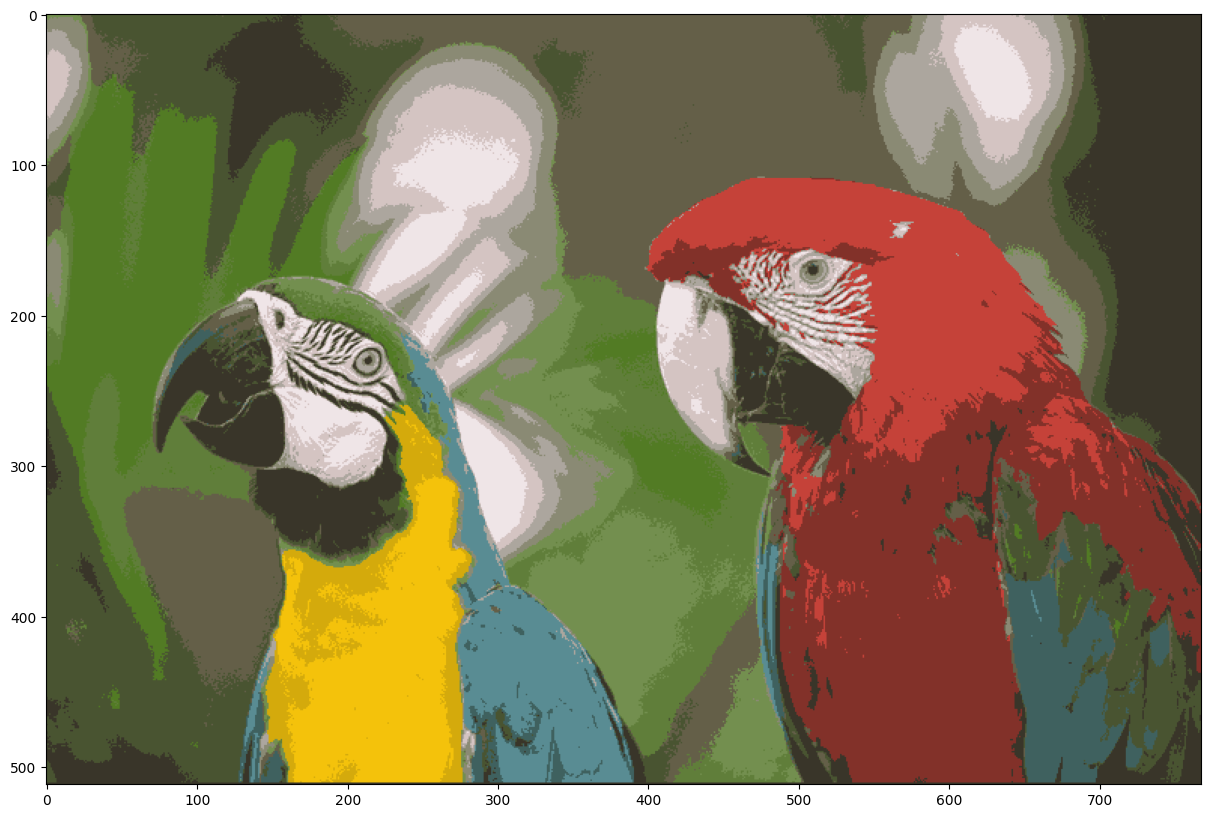

In [30]:
plt.imshow(quantized)

In [ ]:
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

# Floyd-Steinberg diffusion coefficients
fs_diffusion_matrix = np.array([[0, 0, 7/16],
                                [3/16, 5/16, 1/16]])

for r in range(1, rows-1):
    for c in range(1, cols-1):
        pixel = img_tmp[r, c]

        distances = np.linalg.norm(colors - pixel, axis=1)
        closest_color_idx = np.argmin(distances)
        new_pixel = colors[closest_color_idx]

        # Compute quantization error
        quant_error = pixel - new_pixel

        img_tmp[r, c+1] += quant_error * 7/16
        img_tmp[r+1, c-1] += quant_error * 3/16
        img_tmp[r+1, c] += quant_error * 5/16
        img_tmp[r+1, c+1] += quant_error * 1/16

        # Apply dithering
        dithering[r, c, :] = new_pixel

plt.imshow(dithering)
plt.show()
